# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [1]:
import pandas as pd

pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
# 检查数据维度
data.shape
import warnings
warnings.filterwarnings("ignore")

In [3]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [4]:
# 清除缺失值
data.dropna(inplace=True)
data.shapey = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)

In [5]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [6]:
# 提示：查看train_test_split函数
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SeriousDlqin2yrs
0    101322
1      7326
Name: count, dtype: int64


<Axes: xlabel='SeriousDlqin2yrs'>

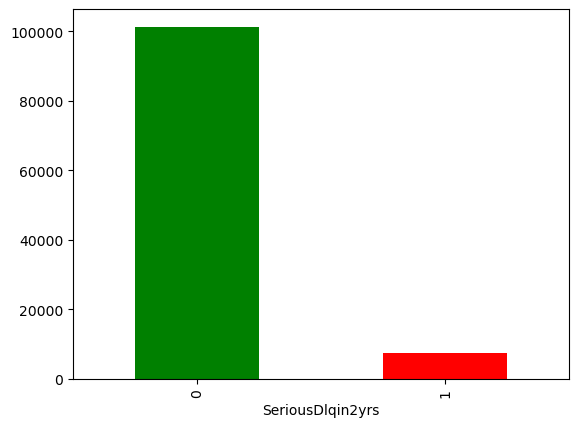

In [7]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
df = pd.DataFrame(data)

# 使用value_counts查看正负值的分布
label_counts = df['SeriousDlqin2yrs'].value_counts()

# 打印结果
print(label_counts)
label_counts.plot(kind='bar', color=['green', 'red'])
# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar')



#### 2.数据预处理之离散化

In [8]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)

bin_edges = list(range(20, 80, 3)) 
df['age_group'] = pd.cut(df['age'], bins=bin_edges)
df = pd.DataFrame(data)
print(df)

        SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines   age  \
0                      1                              0.766127  45.0   
1                      0                              0.957151  40.0   
2                      0                              0.658180  38.0   
3                      0                              0.233810  30.0   
4                      0                              0.907239  49.0   
...                  ...                                   ...   ...   
112910                 0                              0.385742  50.0   
112911                 0                              0.040674  74.0   
112912                 0                              0.299745  44.0   
112913                 0                              0.000000  30.0   
112914                 0                              0.850283  64.0   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                        2.0   0.802982      

#### 3.数据预处理之独热向量编码

In [9]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
df['age_group'] = pd.cut(df['age'], bins=bin_edges)
age_dummies = pd.get_dummies(df['age_group'], prefix='age')
df = pd.concat([df, age_dummies], axis=1)
print(df)

        SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines   age  \
0                      1                              0.766127  45.0   
1                      0                              0.957151  40.0   
2                      0                              0.658180  38.0   
3                      0                              0.233810  30.0   
4                      0                              0.907239  49.0   
...                  ...                                   ...   ...   
112910                 0                              0.385742  50.0   
112911                 0                              0.040674  74.0   
112912                 0                              0.299745  44.0   
112913                 0                              0.000000  30.0   
112914                 0                              0.850283  64.0   

        NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                        2.0   0.802982      

#### 4.数据预处理之幅度缩放

In [10]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

# 将缩放后的值重新放入数据框
data1= pd.DataFrame(scaled_features)
print(data1)

              0         1         2         3         4         5         6   \
0       3.718934 -0.020107 -0.440122  0.459927  2.228325  0.144439  0.842602   
1      -0.268894 -0.019371 -0.786059 -0.107406 -0.827015 -0.292437 -0.912435   
2      -0.268894 -0.020522 -0.924434  0.176260 -0.991928 -0.262821 -1.302443   
3      -0.268894 -0.022156 -1.477933 -0.107406 -1.212020 -0.245533 -0.717431   
4      -0.268894 -0.019564 -0.163372  0.176260 -1.261921  3.794102 -0.327423   
...          ...       ...       ...       ...       ...       ...       ...   
108643 -0.268894 -0.021571 -0.094185 -0.107406  0.439864 -0.238833 -0.327423   
108644 -0.268894 -0.022899  1.566312 -0.107406 -0.363830 -0.325940 -0.912435   
108645 -0.268894 -0.021902 -0.509309 -0.107406  1.840658 -0.092492 -0.912435   
108646 -0.268894 -0.023056 -1.477933 -0.107406 -1.373734 -0.083648 -0.912435   
108647 -0.268894 -0.019783  0.874438 -0.107406 -0.252683  0.079980 -0.132419   

              7         8         9    

#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [11]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression

y = data['SeriousDlqin2yrs']
X = data1.iloc[:, 1:]
#print(X)
#print(y)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
coefficients = model.coef_[0]
intercept = model.intercept_

# 打印系数
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# 分析重要度
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
intercept_df = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [intercept]})
feature_importance = pd.concat([feature_importance, intercept_df], ignore_index=True)
print("\nFeature Importance:")
print(feature_importance)

Intercept: [-2.857861]
Coefficients: [-0.01986624 -0.36793125  1.64542511  0.30597648 -0.0692487  -0.11631852
  1.50812368 -0.20482227 -2.99212814  0.11510275]

Feature Importance:
      Feature            Coefficient
0           1              -0.019866
1           2              -0.367931
2           3               1.645425
3           4               0.305976
4           5              -0.069249
5           6              -0.116319
6           7               1.508124
7           8              -0.204822
8           9              -2.992128
9          10               0.115103
10  Intercept  [-2.8578609991712987]


#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [12]:
# 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty': ['l1', 'l2'], 'C': [1, 10, 100, 500]}
# 使用 GridSearchCV 进行网格搜索交叉验证
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 输出最优的参数组合
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# 输出最优的模型
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print("Accuracy on Test Set:", accuracy)

Best Parameters: {'C': 1, 'penalty': 'l2'}
Accuracy on Test Set: 0.933087896916705


In [13]:
# 输出最好的超参数
# 输出最好的模型
#Best Parameters: {'C': 1, 'penalty': 'l2'}
#Accuracy on Test Set: 0.933087896916705


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [14]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, f1_score

y_pred = model.predict(X_test)

# 计算各种测试指标
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
conf_matrix = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("AUC:", roc_auc)
print("Confusion Matrix:")
print(conf_matrix)
print("F1 Score:", f1)

Accuracy: 0.933087896916705
Recall: 0.0444743935309973
AUC: 0.7093870394151931
Confusion Matrix:
[[20210    36]
 [ 1418    66]]
F1 Score: 0.08322824716267338


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [15]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标
model = LogisticRegression()

# 训练模型
model.fit(X_train, y_train)

# 获取不同阈值下的预测概率
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for threshold in thresholds:
    y_pred_threshold = (model.predict_proba(X_test)[:, 1] > threshold).astype(int)

    # 计算各种测试指标
    accuracy = accuracy_score(y_test, y_pred_threshold)
    recall = recall_score(y_test, y_pred_threshold)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    conf_matrix = confusion_matrix(y_test, y_pred_threshold)
    f1 = f1_score(y_test, y_pred_threshold)

    # 打印结果
    print(f"\nMetrics with Threshold ({threshold}):")
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("AUC:", roc_auc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("F1 Score:", f1)


Metrics with Threshold (0.1):
Accuracy: 0.8506212609295905
Recall: 0.43463611859838275
AUC: 0.7093870394151931
Confusion Matrix:
[[17839  2407]
 [  839   645]]
F1 Score: 0.28439153439153436

Metrics with Threshold (0.2):
Accuracy: 0.9291762540266912
Recall: 0.18059299191374664
AUC: 0.7093870394151931
Confusion Matrix:
[[19923   323]
 [ 1216   268]]
F1 Score: 0.25831325301204816

Metrics with Threshold (0.3):
Accuracy: 0.9335480901978831
Recall: 0.10377358490566038
AUC: 0.7093870394151931
Confusion Matrix:
[[20132   114]
 [ 1330   154]]
F1 Score: 0.17579908675799089

Metrics with Threshold (0.4):
Accuracy: 0.9338702254947078
Recall: 0.07142857142857142
AUC: 0.7093870394151931
Confusion Matrix:
[[20187    59]
 [ 1378   106]]
F1 Score: 0.12856276531231048

Metrics with Threshold (0.5):
Accuracy: 0.933087896916705
Recall: 0.0444743935309973
AUC: 0.7093870394151931
Confusion Matrix:
[[20210    36]
 [ 1418    66]]
F1 Score: 0.08322824716267338

Metrics with Threshold (0.6):
Accuracy: 0.9325

#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [16]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel
model = LogisticRegression()
from sklearn.feature_selection import SelectFromModel
# 训练模型
model.fit(X_train, y_train)

# 获取特征的重要度（系数的绝对值）
feature_importance = abs(model.coef_[0])

# 打印各个特征的重要度
print("Feature Importance:")
print(feature_importance)

# 使用SelectFromModel进行特征选择
sfm = SelectFromModel(model, threshold=0.2)  # 选择重要度大于阈值的特征
sfm.fit(X_train, y_train)

# 获取选择后的特征
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# 重新训练模型
model_selected = LogisticRegression()
model_selected.fit(X_train_selected, y_train)

# 在测试集上进行预测
y_pred_selected = model_selected.predict(X_test_selected)

# 计算准确率等评估指标
accuracy_selected = accuracy_score(y_test, y_pred_selected)

# 打印结果
print("\nMetrics with Feature Selection:")
print("Accuracy:", accuracy_selected)


Feature Importance:
[0.01986624 0.36793125 1.64542511 0.30597648 0.0692487  0.11631852
 1.50812368 0.20482227 2.99212814 0.11510275]

Metrics with Feature Selection:
Accuracy: 0.9332719742291763


#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

In [ ]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
# 支持向量机
from sklearn.svm import SVC
# K最近邻
from sklearn.neighbors import KNeighborsClassifier

rf_model = RandomForestClassifier()
rf_param_grid = {'n_estimators': [50, 100, 200],
                 'max_depth': [None, 10, 20],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4]}

# 使用 GridSearchCV 进行网格搜索交叉验证
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)

rf_best_params = rf_grid_search.best_params_
print("Random Forest Best Parameters:", rf_best_params)
rf_best_model = rf_grid_search.best_estimator_

rf_accuracy = accuracy_score(y_test, rf_best_model.predict(X_test))
print("Random Forest Accuracy on Test Set:", rf_accuracy)

svm_model = SVC()
svm_param_grid = {'C': [0.1, 1, 10, 100],
                  'kernel': ['linear', 'rbf', 'poly'],
                  'gamma': ['scale', 'auto']}

# 使用 GridSearchCV 进行网格搜索交叉验证
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)

svm_best_params = svm_grid_search.best_params_
print("\nSVM Best Parameters:", svm_best_params)

svm_best_model = svm_grid_search.best_estimator_

svm_accuracy = accuracy_score(y_test, svm_best_model.predict(X_test))
print("SVM Accuracy on Test Set:", svm_accuracy)



knn_model = KNeighborsClassifier()
knn_param_grid = {'n_neighbors': [3, 5, 7],
                  'weights': ['uniform', 'distance'],
                  'p': [1, 2]}

knn_grid_search = GridSearchCV(knn_model, knn_param_grid, cv=5)
knn_grid_search.fit(X_train, y_train)
knn_best_params = knn_grid_search.best_params_
print("\nKNN Best Parameters:", knn_best_params)
knn_best_model = knn_grid_search.best_estimator_
knn_accuracy = accuracy_score(y_test, knn_best_model.predict(X_test))
print("KNN Accuracy on Test Set:", knn_accuracy)